**Iteration 2: Reduce Parameters**

Changes:
*   Reducing 3x3 parameters
*   Reducing 1x1 parameters
*   Adding Partical Transition Block (1x1 conv but no maxPool)

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


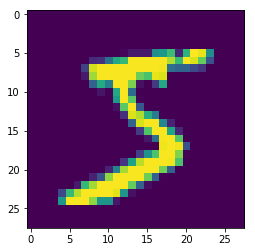

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # change 1 # 26 
model.add(Convolution2D(16, 3, 3, activation='relu')) # change 1 # 24

model.add(Convolution2D(10, 1, 1, activation='relu')) # change 2 # 12
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(16, 3, 3, activation='relu')) # change 1 # 10
model.add(Convolution2D(20, 3, 3, activation='relu')) # change 1 # 8

model.add(Convolution2D(12, 1, 1, activation='relu')) # change 3 # 8

model.add(Convolution2D(16, 3, 3, activation='relu')) # change 1 # 6
model.add(Convolution2D(20, 3, 3, activation='relu')) # change 1 # 4


model.add(Convolution2D(10, 1, activation='relu')) # change 1 #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 20)          2900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 12)          252       
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.3375 - acc: 0.8915
Epoch 2/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.1086 - acc: 0.9669
Epoch 3/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0821 - acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0687 - acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0570 - acc: 0.9826
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0524 - acc: 0.9833
Epoch 7/20
60000/60000 [==============================] - 11s 184us/step - loss: 0.0459 - acc: 0.9854
Epoch 8/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.0410 - acc: 0.9872
Epoch 9/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0384 - acc: 0.9878
Epoch 10/20
60000/60000 [==============================] - 12s 195us/step - loss: 

In [15]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1)

Epoch 1/20
  384/60000 [..............................] - ETA: 24s - loss: 0.0196 - acc: 0.9948

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 19s 319us/step - loss: 0.0194 - acc: 0.9935
Epoch 2/20
60000/60000 [==============================] - 19s 316us/step - loss: 0.0159 - acc: 0.9946
Epoch 3/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0171 - acc: 0.9945
Epoch 4/20
60000/60000 [==============================] - 20s 339us/step - loss: 0.0144 - acc: 0.9950
Epoch 5/20
60000/60000 [==============================] - 19s 311us/step - loss: 0.0151 - acc: 0.9948
Epoch 6/20
60000/60000 [==============================] - 19s 323us/step - loss: 0.0142 - acc: 0.9953
Epoch 7/20
60000/60000 [==============================] - 14s 230us/step - loss: 0.0137 - acc: 0.9955
Epoch 8/20
60000/60000 [==============================] - 11s 177us/step - loss: 0.0145 - acc: 0.9951
Epoch 9/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0129 - acc: 0.9958
Epoch 10/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0129 - ac

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [17]:
print(score)

[0.047876747752471104, 0.989]


In [0]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[9.69639511e-17 3.18365403e-11 2.53272141e-08 2.63044808e-10
  2.03350411e-19 6.02918158e-16 1.09338102e-31 1.00000000e+00
  2.72957738e-22 5.19716462e-15]
 [5.05127590e-14 1.05597142e-10 1.00000000e+00 1.51584272e-19
  6.86012935e-18 5.31398100e-23 7.62555895e-15 5.09506129e-25
  1.36879984e-15 5.35144651e-25]
 [3.76226522e-10 9.99998927e-01 2.46598464e-10 1.14864741e-11
  5.19695220e-07 4.21544848e-11 1.43720586e-14 2.05433977e-07
  1.81937008e-08 2.80003434e-07]
 [9.99999881e-01 5.36812478e-12 6.05718531e-10 1.30579597e-12
  1.38715950e-09 7.05750805e-11 1.37719454e-07 8.80294999e-15
  1.03135191e-11 1.17425303e-09]
 [9.17848957e-12 5.14650070e-14 1.32496248e-20 1.58221440e-19
  9.99999404e-01 2.95493339e-12 3.73334502e-10 9.87559210e-13
  6.83923607e-14 5.67213021e-07]
 [2.45140575e-11 9.99999762e-01 6.62167474e-11 2.57666338e-14
  1.20330043e-07 1.03206645e-14 7.96822369e-16 1.12225628e-07
  5.68709790e-09 4.58958596e-08]
 [4.44018577e-22 5.04731812e-10 8.86408121e-14 2.33994196e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

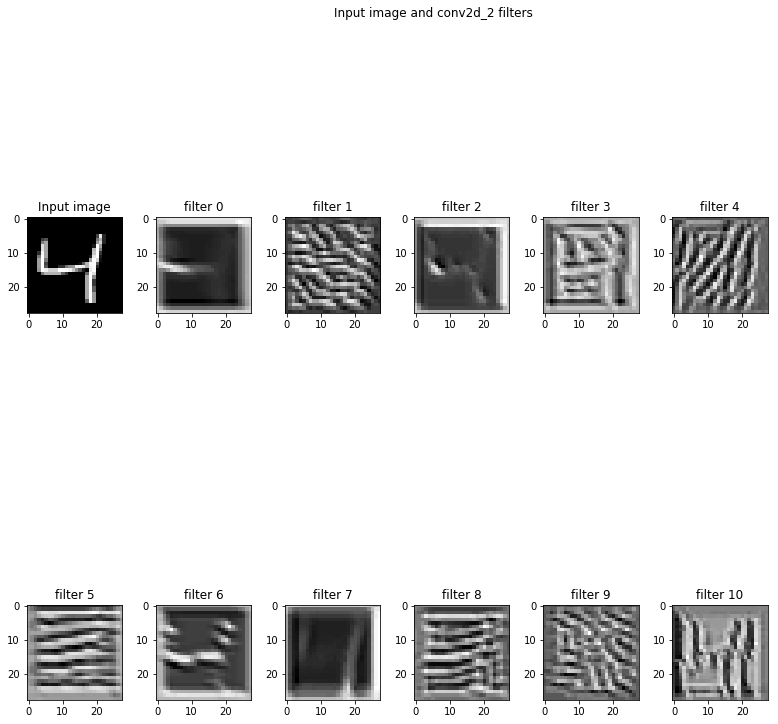

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()